<a href="https://colab.research.google.com/github/smit977/Machine-learning-/blob/master/mobile_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


In [ ]:
df_train=pd.read_csv("/content/drive/MyDrive/Colab/kaggle/archive (4)/train.csv")
df_test=pd.read_csv("/content/drive/MyDrive/Colab/kaggle/archive (4)/test.csv")

In [ ]:
df_train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


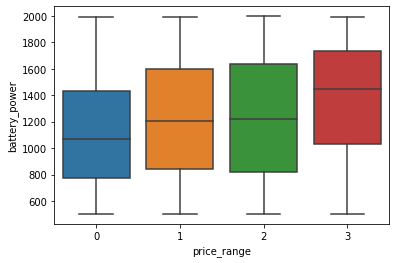

In [ ]:
sns.boxplot(x='price_range',y='battery_power',data=df_train)

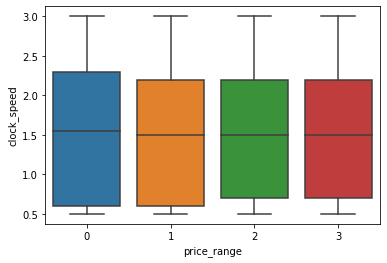

In [ ]:
sns.boxplot(x='price_range',y='clock_speed',data=df_train)


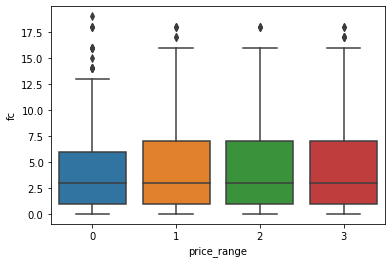

In [ ]:
sns.boxplot(x='price_range',y='fc',data=df_train)

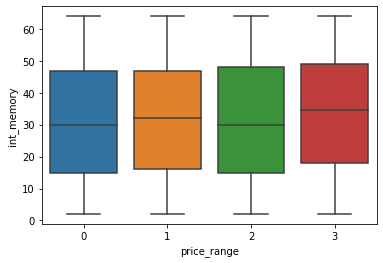

In [ ]:
sns.boxplot(x='price_range',y='int_memory',data=df_train)

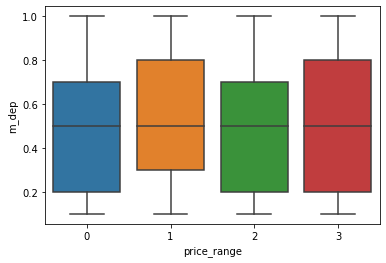

In [ ]:
sns.boxplot(x='price_range',y='m_dep',data=df_train)

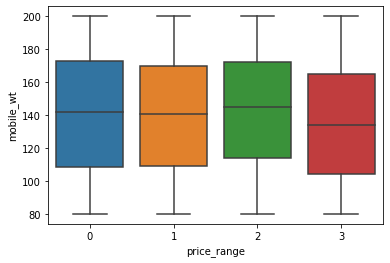

In [ ]:
sns.boxplot(x='price_range',y='mobile_wt',data=df_train)


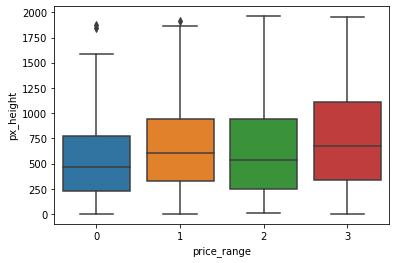

In [ ]:
sns.boxplot(x='price_range',y='px_height',data=df_train)


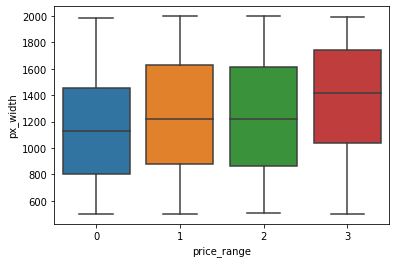

In [ ]:
sns.boxplot(x='price_range',y='px_width',data=df_train)

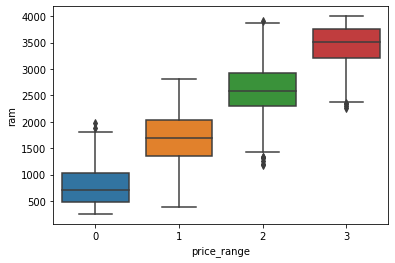

In [ ]:
sns.boxplot(x='price_range',y='ram',data=df_train)


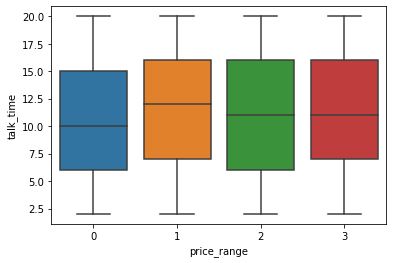

In [ ]:
sns.boxplot(x='price_range',y='talk_time',data=df_train)

In [ ]:
#let's remove outlier of ram and fc column
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
df_train=remove_outlier(df_train,'fc')
df_train=remove_outlier(df_train,'ram')

In [ ]:
df_train.shape

(1958, 21)

Text(0.5, 1.0, 'Correlations')

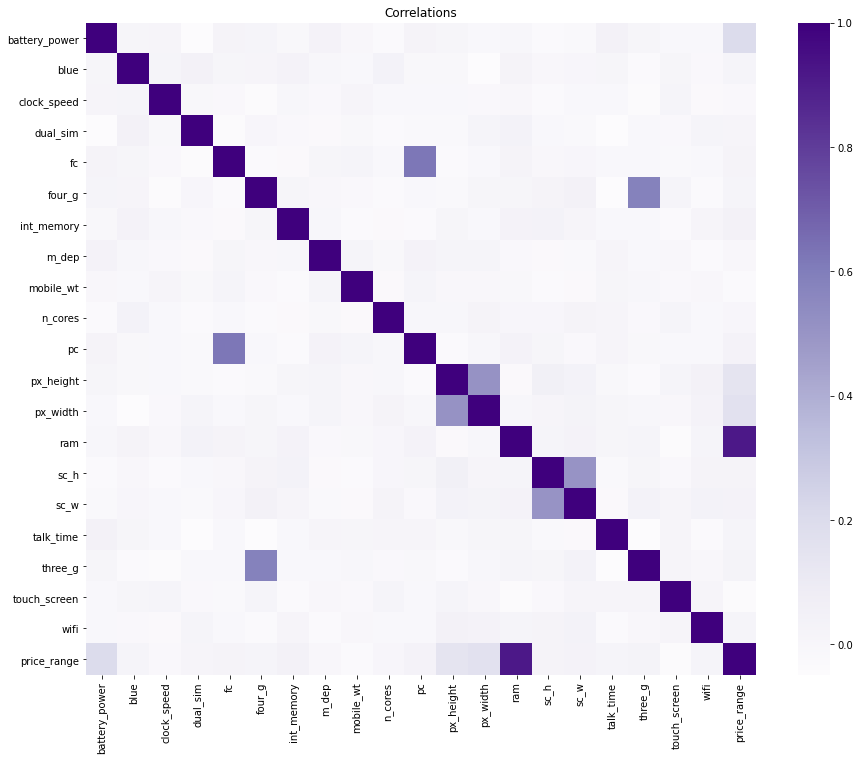

In [ ]:
corr=df_train.corr()
fig = plt.figure(figsize=(15,12))
relation = sns.heatmap(corr, cmap='Purples')
relation.set_title('Correlations')


In [ ]:
X=df_train.iloc[:,:20]
y=df_train.iloc[:,20]

In [ ]:
#now lets define standard scaler
scaler=StandardScaler()

In [ ]:
X=scaler.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y)

In [ ]:
#first model (logistic regression)
model1=LogisticRegression()
model1.fit(X_train,y_train)
model1.score(X_test,y_test)


0.95578231292517

In [ ]:
#Decision tree classifier algorithm
model2=DecisionTreeClassifier()
model2.fit(X_train,y_train)
model2.score(X_test,y_test)


0.7874149659863946

In [ ]:
#randomforest classifier
model3=RandomForestClassifier(n_estimators=1000)
model3.fit(X_train,y_train)
model3.score(X_test,y_test)


0.8690476190476191

In [ ]:
#kneighbors classifier
model4=KNeighborsClassifier(n_neighbors=17)
model4.fit(X_train,y_train)
model4.score(X_test,y_test)


0.5884353741496599

In [ ]:
#SVC 
model5=SVC()
model5.fit(X_train,y_train)
model5.score(X_test,y_test)


0.8775510204081632

In [ ]:
df_test.drop(['id'],axis=1,inplace=True)

In [ ]:
#from the above models we can say that logistic regression doing amazing on train data set now lets check it on test data
df_test=scaler.transform(df_test)

In [ ]:
pred=model1.predict(df_test)

In [ ]:
pred

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 2, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 0, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 1, 2, 2, 3, 2, 2, 1, 0, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 1, 3, 0, 1, 3, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [ ]:
import joblib 
joblib.dump(model1,'/content/drive/MyDrive/Colab/kaggle/archive (4)/MBP.sav')

['/content/drive/MyDrive/Colab/kaggle/archive (4)/MBP.sav']